# Macrodispersivity

## Overview
Collection, analysis and plots of reliable values for longitudinal, transverse horizontal and transverse vertical dispersivity from field tracer tests, based on the three publications:
* *Is unique scaling of aquifer macrodispersivity supported by field data?* Zech et al, 2015, Water Resour. Res., 51,  [https://doi.org/10.1002/2015WR017220](https://doi.org/10.1002/2015WR017220).
* *A Critical Analysis of Transverse Dispersivity  Field Data* Zech et al, 2018, Groundwater, [https://doi.org/10.1111/gwat.12838](https://doi.org/10.1111/gwat.12838)
* *Evidence Based Estimation of Macrodispersivity  for Groundwater Transport Applications* by Zech et al, 2022, Groundwater, [https://doi.org/10.1111/gwat.13252](https://doi.org/10.1111/gwat.13252)




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### plot settings
textsize=10
mec = 'k'
msize = 50
msize2 = 60
c_R1, c_R2 = 'C3','C0'

## Data

Extensive summary of reliable macrodispersivities for all sites, with additional information and sorted by level of heterogeneity:

In [3]:
data_xlsx = pd.read_excel('./data/Dispersivity_GeoStats.xlsx',skiprows = [1])
#display(data_xlsx)

Reliable Macrodispersivities for selected sites which provide spatial evolution from experimental data (scale dependent longitudinal dispersivity):

In [4]:
data_aquifers = pd.read_excel('./data/Aquifer_dispersivities_assympotic.xlsx')#,sep = ',') 
#display(data_aquifers)

## Reliable Macrodispersivity from Field Tracer Tests

Reproducing analysis and plots from papers as starting point for preparing condensed figures for lectures and lectures notes.

### Longitudinal Macrodispersivity

#### Data collaction of Longitudinal Macrodispersivity vs scale

Reproducing **Zech et al, 2015, Figure 4** of *Is unique scaling of aquifer macrodispersivity supported by field data?* 

Caption: Reevaluated and newly evaluated macrodispersivities of high and moderate reliability, reduced to one value per field site and experiment, namely the value of highest reliability.

In [5]:
### Filter Reliability
filter_R1 = (data_xlsx['Reliability – A_L']==1) #high reliability
filter_R2 = (data_xlsx['Reliability – A_L']==2) #moderate reliability

### Filter data for scales and alpha_L values for both reliabilities
scale_R1 = data_xlsx['Scale'][filter_R1]
aL_R1 = data_xlsx['A_L'][filter_R1]

scale_R2 = data_xlsx['Scale'][filter_R2]
aL_R2 = data_xlsx['A_L'][filter_R2]

Save figure of longitudinal dispersivity to ./results/Zech-et-al-2015_Fig4_Longitudinal_Dispersivities.pdf


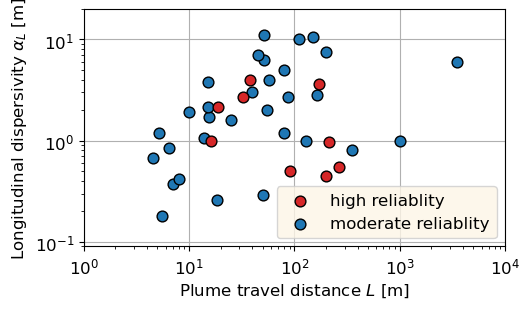

In [6]:
# direct plotting using predefined plot settings from visualize
from scripts.visualize.plot_dispersivity_data import plot_alphaL_vs_scale

fig = plot_alphaL_vs_scale(scale_R1,aL_R1,
                     scale_R2,aL_R2,
                     save_fig = './results/Zech-et-al-2015_Fig4_Longitudinal_Dispersivities.pdf')

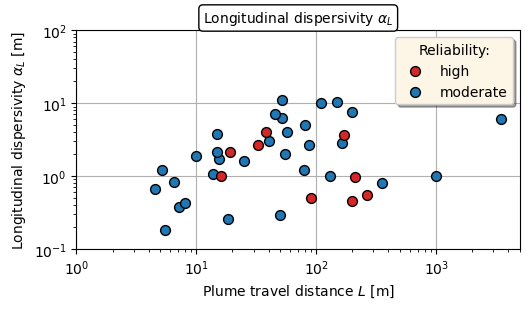

In [7]:
# plotting allowing changes of plot settings

plt.figure(1,figsize=[5.4,3.2])
plt.scatter(scale_R1,aL_R1,color= 'C3',marker='o',zorder = 11,edgecolor='k',s=50,label=r'high')
plt.scatter(scale_R2,aL_R2,color='C0',marker='o',zorder = 10,edgecolor='k',s=50,label=r'moderate')

textsize=10
plt.xlabel('Plume travel distance $L$ [m]',fontsize=textsize)    
plt.ylabel(r'Longitudinal dispersivity $\alpha_L$ [m]',fontsize=textsize)    
plt.grid(True)
plt.xscale('log')
plt.xlim([1,5000])
plt.yscale('log')
plt.ylim([0.1,100])
plt.title(r'Longitudinal dispersivity $\alpha_L$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.legend(title = 'Reliability:',loc='upper right',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Zech-et-al-2015_Fig4_Longitudinal_Dispersivities.png", dpi=300)
# plt.savefig("./results/Zech-et-al-2015_Fig4_Longitudinal_Dispersivities.pdf")

#### Aquifer specific Longitudinal macrodispersivity vs scale
Reproducing **Zech et al, 2015, Figure 5** of *Is unique scaling of aquifer macrodispersivity supported by field data?* 

Caption: Spatial evolution of longitudinal macrodispersivity ($\alpha_L$ versus plume travel distance) for a few selected aquifers: Chalk River [Moltyaner et al., 1993], Borden [Freyberg, 1986; Rajaram and Gelhar, 1991], Cape Cod [Garabedian et al., 1991], Krauthausen [Vereecken et al., 2000], Horkheimer Insel [Ptak and Teutsch, 1994], Corbas [Sauty, 1977; Welty and Gelhar, 1989]. Circles for $\alpha_L$ values of highly reliable and diamonds for moderately reliable sites. Triangles on the left denote asymptotic value from theory linking to heterogeneity of hydraulic conductivity: $\alpha_L = \sigma^2 \cdot \ell$, where $\sigma^2$ is the log-conductivity variance and $\ell$ is the correlation length/integral scale. 

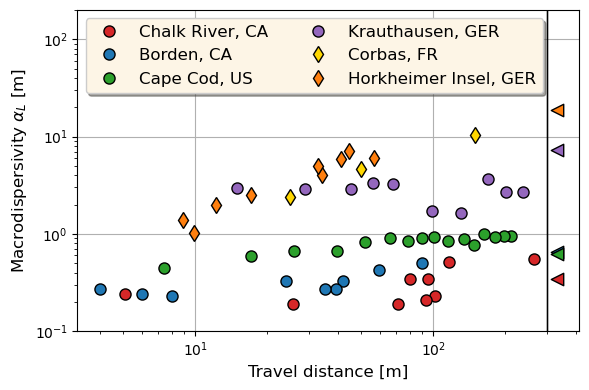

In [8]:
# direct plotting using predefined plot settings from visualize
from scripts.visualize.plot_dispersivity_data import plot_aL_aquifer

fig = plot_aL_aquifer(data_aquifers,
                figsize= [6,4],
                ylim = [0.1,200])
#                save_fig = './results/Zech-et-al-2015_Fig5_Aquifer_dispersivities.pdf')

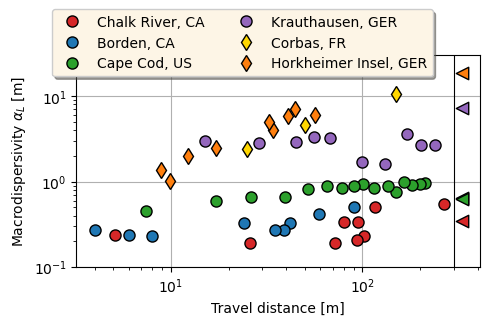

In [9]:
#display(data_aquifers)
marker = ['o','d']
colors = ['C3','C0','C2','C4','gold','C1']

plt.figure(figsize=[5,3.5])
for j,i in enumerate([1,5,3,2,4,8]): #range(1,10): #
    filter_exp = data_aquifers['Experiment'] == i
    site_name = data_aquifers['site name'].loc[filter_exp].iloc[0]
    reliability = data_aquifers['reliability'].loc[filter_exp].iloc[0]
    sigma = data_aquifers['sigma'].loc[filter_exp].iloc[0]
    ell = data_aquifers['ell'].loc[filter_exp].iloc[0]
    plt.plot(data_aquifers['scale'].loc[filter_exp],data_aquifers['AL'].loc[filter_exp],marker = marker[reliability-1],ms = 8,mec = 'k',ls = '',c = colors[j],label = site_name)
    plt.scatter(330,sigma*ell,marker = '<',s = 80,edgecolors = 'k',color = colors[j])
plt.plot([300,300],[0,30],c='k',lw = 0.8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Travel distance [m]',fontsize = textsize)
plt.ylabel(r'Macrodispersivity $\alpha_L$ [m]',fontsize = textsize)
plt.ylim([0.1,30])
plt.grid(True)
plt.legend(ncols=2,fontsize = textsize,bbox_to_anchor=(0.9, 1.25),framealpha = 1,shadow=True,facecolor='oldlace')
#plt.legend(ncols=2,fontsize = textsize,bbox_to_anchor=(0.85, 1.1),framealpha = 1,shadow=True,facecolor='oldlace')

plt.tight_layout()
plt.savefig('./results/Zech-et-al-2015_Fig5_Aquifer_dispersivities.pdf')
#plt.savefig('./results/Zech-et-al-2015_Fig5_Aquifer_dispersivities.png',dpi = 300)

### Transverse horizontal dispersivities

Reproducing **Figure 2a** of *A Critical Analysis of Transverse Dispersivity  Field Data* Zech et al, 2018, Groundwater, doi: 10.1111/gwat.12838

Captin: (a) Reliable transverse horizontal dispersivities $\alpha_T$ vs. observation scale (=plume travel distance) $L$. Values are marked according to high (R1, red) and moderate (R2, blue) reliability.

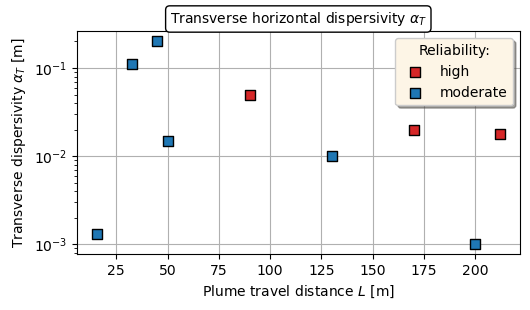

In [10]:
### Plotting transverse horizontal dispersivity
plt.figure(figsize=[5.4,3.2])
#plt.scatter(data['scale'].loc[data['R – At/AV'] == 1.0],data['AT'].loc[data['R – At/AV'] == 1.0], color='gold',marker='s',zorder = 11,edgecolor=mec,s=msize2)#,label=r'high')
#plt.scatter(data['scale'].loc[data['R – At/AV'] == 2.0],data['AT'].loc[data['R – At/AV'] == 2.0], color='C2',marker='s',zorder = 10,edgecolor=mec,s=msize2)#,label=r'moderate')
plt.scatter(data_xlsx['Scale'].loc[data_xlsx['Reliability – A_T/A_V']==1],data_xlsx['A_T'].loc[data_xlsx['Reliability – A_T/A_V']==1],color=c_R1,marker='s',zorder = 11,edgecolor=mec,s=msize,label=r'high')
plt.scatter(data_xlsx['Scale'].loc[data_xlsx['Reliability – A_T/A_V']==2],data_xlsx['A_T'].loc[data_xlsx['Reliability – A_T/A_V']==2],color=c_R2,marker='s',zorder = 10,edgecolor=mec,s=msize,label=r'moderate')

plt.legend(loc='upper center',fontsize=textsize,ncol=2,facecolor='oldlace')
plt.xlabel('Plume travel distance $L$ [m]',fontsize=textsize)    
plt.ylabel(r'Transverse dispersivity $\alpha_T$ [m]',fontsize=textsize)    
plt.grid(True)
# plt.xscale('log')
# plt.xlim([9,1.1e3])
plt.yscale('log')
# plt.ylim([3e-4,1])
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.title(r'Transverse horizontal dispersivity $\alpha_T$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
plt.legend(title = 'Reliability:',loc='upper right',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Transverse_Dispersivities_AT.png", dpi=300)
# plt.savefig("./results/Transverse_Dispersivities_AT.pdf")

In [11]:
print("Minimum values of tranverse horizontal dispersivity A_T [m]:", data_xlsx['A_T'].min())
print("Maximum values of tranverse horizontal dispersivity A_T [m]:", data_xlsx['A_T'].max())
print("Minimum values of tranverse vertical dispersivity A_V [m]:", data_xlsx['A_V'].min())
print("Maximum values of tranverse vertical dispersivity A_V [m]:", data_xlsx['A_V'].max())

Minimum values of tranverse horizontal dispersivity A_T [m]: 0.001
Maximum values of tranverse horizontal dispersivity A_T [m]: 0.2
Minimum values of tranverse vertical dispersivity A_V [m]: 0.0005
Maximum values of tranverse vertical dispersivity A_V [m]: 0.06


### Transverse vertical dispersivities

Reproducing **Figure 2a** of *A Critical Analysis of Transverse Dispersivity  Field Data* Zech et al, 2018, Groundwater, doi: 10.1111/gwat.12838

Caption: (a) Reliable transverse vertical dispersivities $\alpha_V$ vs. observation scale (=plume travel distance) $L$. Values are marked according to high (R1, red) and moderate (R2, blue) reliability.

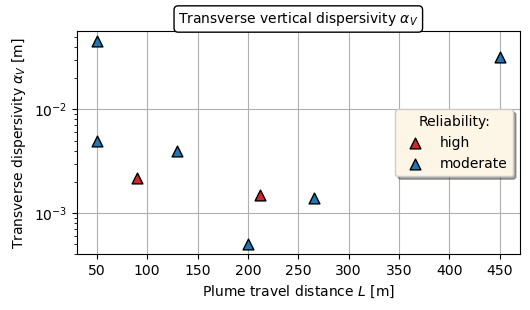

In [12]:
### Plotting transverse vertical dispersivity
plt.figure(1,figsize=[5.4,3.2])

# plt.scatter(data['scale'].loc[data['R – At/AV'] == 1.0],data['Av'].loc[data['R – At/AV'] == 1.0], color='gold',marker='^',zorder = 11,edgecolor=mec,s=msize2)#,label=r'high')
# plt.scatter(data['scale'].loc[data['R – At/AV'] == 2.0],data['Av'].loc[data['R – At/AV'] == 2.0], color='C2',marker='^',zorder = 10,edgecolor=mec,s=msize2)#,label=r'moderate')
plt.scatter(data_xlsx['Scale'].loc[data_xlsx['Reliability – A_T/A_V']==1],data_xlsx['A_V'].loc[data_xlsx['Reliability – A_T/A_V']==1],color=c_R1,marker='^',zorder = 11,edgecolor=mec,s=msize2,label=r'high')
plt.scatter(data_xlsx['Scale'].loc[data_xlsx['Reliability – A_T/A_V']==2],data_xlsx['A_V'].loc[data_xlsx['Reliability – A_T/A_V']==2],color=c_R2,marker='^',zorder = 10,edgecolor=mec,s=msize2,label=r'moderate')

plt.xlabel('Plume travel distance $L$ [m]',fontsize=textsize)    
plt.ylabel(r'Transverse dispersivity $\alpha_V$ [m]',fontsize=textsize)    
plt.grid(True)
#plt.xscale('log')
#plt.xlim([9,1.1e3])
plt.yscale('log')
#plt.ylim([3e-4,1])
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.title(r'Transverse vertical dispersivity $\alpha_V$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
plt.legend(title = 'Reliability:',loc='center right',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Transverse_Dispersivities_AV.png", dpi=300)
# plt.savefig("./results/Transverse_Dispersivities_AV.pdf")

## Ratios between dispersivities

Relating longitudinal dispersivity $\alpha_L$, transverse horizontal dispersivity $\alpha_T$, and transverse vertical $\alpha_V$ dispersivity of high (R1, red) and moderate (R2, blue) reliability. The corresponding dispersivity values are listed in Table X.

### Ratios between all dispersivities
Reproducing **Figure 3** of *A Critical Analysis of Transverse Dispersivity  Field Data* Zech et al, 2018, Groundwater, doi: 10.1111/gwat.12838

Caption: Ratios between longitudinal $\alpha_L$, transverse horizontal $\alpha_T$, and transverse vertical $\alpha_V$ dispersivities of high (R1) and moderate (R2) reliability.

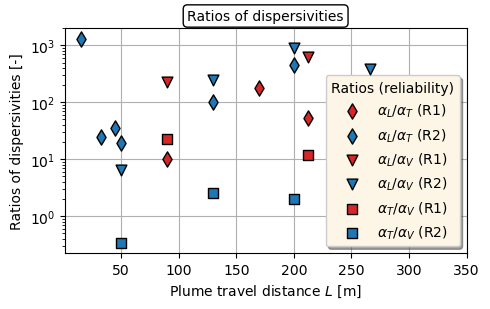

In [13]:
### Ratios of dispersivities
plt.figure(1,figsize=[5.0,3.2])
filter_R1 = (data_xlsx['Reliability – A_T/A_V']==1)
filter_R2 = (data_xlsx['Reliability – A_T/A_V']==2)

plt.scatter(data_xlsx['Scale'].loc[filter_R1],data_xlsx['A_L'].loc[filter_R1]/data_xlsx['A_T'].loc[filter_R1],color=c_R1,marker='d',zorder = 11,edgecolor=mec,s=msize2,label=r'$\alpha_L/\alpha_T$ (R1)')
plt.scatter(data_xlsx['Scale'].loc[filter_R2],data_xlsx['A_L'].loc[filter_R2]/data_xlsx['A_T'].loc[filter_R2],color=c_R2,marker='d',zorder = 10,edgecolor=mec,s=msize2,label=r'$\alpha_L/\alpha_T$ (R2)')
plt.scatter(data_xlsx['Scale'].loc[filter_R1],data_xlsx['A_L'].loc[filter_R1]/data_xlsx['A_V'].loc[filter_R1],color=c_R1,marker='v',zorder = 11,edgecolor=mec,s=msize2,label=r'$\alpha_L/\alpha_V$ (R1)')
plt.scatter(data_xlsx['Scale'].loc[filter_R2],data_xlsx['A_L'].loc[filter_R2]/data_xlsx['A_V'].loc[filter_R2],color=c_R2,marker='v',zorder = 10,edgecolor=mec,s=msize2,label=r'$\alpha_L/\alpha_V$ (R2)')
plt.scatter(data_xlsx['Scale'].loc[filter_R1],data_xlsx['A_T'].loc[filter_R1]/data_xlsx['A_V'].loc[filter_R1],color=c_R1,marker='s',zorder = 11,edgecolor=mec,s=msize,label=r'$\alpha_T/\alpha_V$ (R1)')
plt.scatter(data_xlsx['Scale'].loc[filter_R2],data_xlsx['A_T'].loc[filter_R2]/data_xlsx['A_V'].loc[filter_R2],color=c_R2,marker='s',zorder = 10,edgecolor=mec,s=msize,label=r'$\alpha_T/\alpha_V$ (R2)')

plt.xlabel('Plume travel distance $L$ [m]',fontsize=textsize)    
plt.ylabel(r'Ratios of dispersivities [-]',fontsize=textsize)    
plt.grid(True)
#plt.xscale('log')
plt.xlim([1,350])
plt.yscale('log')
#plt.ylim([3e-4,1])
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.title(r'Ratios of dispersivities',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
plt.legend(title = 'Ratios (reliability)',loc='lower right',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Ratios_Dispersivities.png", dpi=300)
# plt.savefig("./results/Ratios_Dispersivities.pdf")

### Ratios between transverse to longitudinal dispersivities

Caption: Ratio of transverse horizontal $\alpha_T$ to longitudinal $\alpha_L$ dispersivity of high (R1) and moderate (R2) reliability.

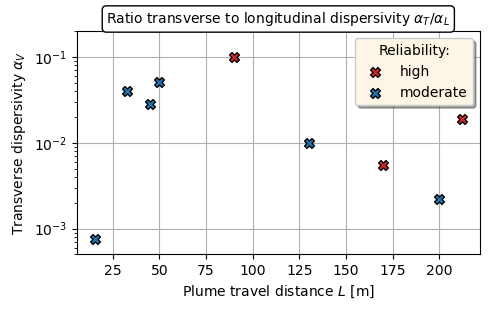

In [14]:
### Plotting ratio of transverse horizontal to longitudinal dispersivity
plt.figure(1,figsize=[5.0,3.2])
filter_R1 = (data_xlsx['Reliability – A_T/A_V']==1)
filter_R2 = (data_xlsx['Reliability – A_T/A_V']==2)

plt.scatter(data_xlsx['Scale'].loc[filter_R1],data_xlsx['A_T'].loc[filter_R1]/data_xlsx['A_L'].loc[filter_R1],color=c_R1,marker='X',zorder = 11,edgecolor=mec,s=msize,label=r'high')
plt.scatter(data_xlsx['Scale'].loc[filter_R2],data_xlsx['A_T'].loc[filter_R2]/data_xlsx['A_L'].loc[filter_R2],color=c_R2,marker='X',zorder = 10,edgecolor=mec,s=msize,label=r'moderate')

plt.xlabel('Plume travel distance $L$ [m]',fontsize=textsize)    
plt.ylabel(r'Transverse dispersivity $\alpha_V$',fontsize=textsize)    
plt.grid(True)
#plt.xscale('log')
#plt.xlim([9,1.1e3])
plt.yscale('log')
plt.ylim([5e-4,0.2])
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.title(r'Ratio transverse to longitudinal dispersivity $\alpha_T/\alpha_L$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
plt.legend(title = 'Reliability:',loc='upper right',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Ratio_AT_AL.png", dpi=300)
# plt.savefig("./results/Ratio_AT_AL.pdf")

### Ratios between transverse vertical to transverse horizontal dispersivities

Caption: Ratio of transverse vertical $\alpha_V$ to transverse horizontal $\alpha_T$ dispersivity of high (R1) and moderate (R2) reliability.

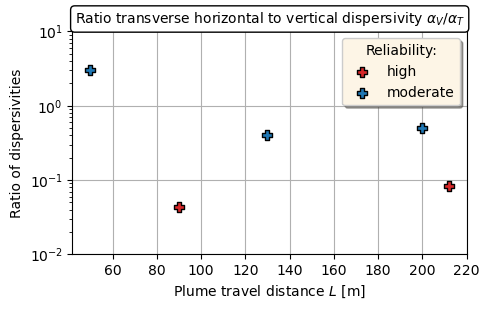

In [15]:
### Plotting ratio of transverse vertical to transverse horizontal dispersivity
plt.figure(1,figsize=[5.0,3.2])
filter_R1 = (data_xlsx['Reliability – A_T/A_V']==1)
filter_R2 = (data_xlsx['Reliability – A_T/A_V']==2)

plt.scatter(data_xlsx['Scale'].loc[filter_R1],data_xlsx['A_V'].loc[filter_R1]/data_xlsx['A_T'].loc[filter_R1],color=c_R1,marker='P',zorder = 11,edgecolor=mec,s=msize2,label=r'high')
plt.scatter(data_xlsx['Scale'].loc[filter_R2],data_xlsx['A_V'].loc[filter_R2]/data_xlsx['A_T'].loc[filter_R2],color=c_R2,marker='P',zorder = 10,edgecolor=mec,s=msize2,label=r'moderate')

plt.xlabel('Plume travel distance $L$ [m]',fontsize=textsize)    
plt.ylabel(r'Ratio of dispersivities',fontsize=textsize)    
plt.grid(True)
#plt.xscale('log')
plt.yscale('log')
plt.ylim([0.01,10])
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.title(r'Ratio transverse horizontal to vertical dispersivity $\alpha_V/\alpha_T$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
plt.legend(title = 'Reliability:',loc='upper right',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Ratio_AT_AV.png", dpi=300)
# plt.savefig("./results/Ratio_AT_AV.pdf")

### Statistics of $\alpha_L$ for heterogeneity classes

Reproducing **Table 1** of *Evidence Based Estimation of Macrodispersivity  for Groundwater Transport Applications* by Zech et al, 2022, Groundwater, doi: 10.1111/gwat.13252

In [16]:
for het_level in [1,2,3]:
    filter_het = (data_xlsx['Heterogeneity class']==het_level)*np.isfinite(data_xlsx['A_L'])

    aL_het = data_xlsx['A_L'][filter_het]
    weights_het = data_xlsx['Info level'][filter_het]/data_xlsx['Reliability – A_L'][filter_het]

    mean_het = np.mean(aL_het)
    std_het = np.std(aL_het)
    
    meanw_het = np.average(aL_het,weights=weights_het)
    stdw_het = np.sqrt(np.average(aL_het**2,weights=weights_het)-meanw_het**2)
    
    print("\nLevel of Heterogeneity: ", het_level)
    print(" Number of sites: {}".format(len(aL_het)))    
    print(" Mean of AL (weighted): {:.2f}".format(meanw_het))
    print(" Std of AL: (weighted) {:.2f}".format(stdw_het))
    # print(" Mean of AL (not weighted): {:.2f}".format(mean_het))
    # print(" Std of AL (not weighted): {:.2f}".format(std_het))
    print(" Coefficient of Variation CV: {:.2f}".format(stdw_het/meanw_het))


Level of Heterogeneity:  1
 Number of sites: 13
 Mean of AL (weighted): 1.14
 Std of AL: (weighted) 1.07
 Coefficient of Variation CV: 0.93

Level of Heterogeneity:  2
 Number of sites: 10
 Mean of AL (weighted): 3.21
 Std of AL: (weighted) 1.50
 Coefficient of Variation CV: 0.47

Level of Heterogeneity:  3
 Number of sites: 7
 Mean of AL (weighted): 7.50
 Std of AL: (weighted) 2.87
 Coefficient of Variation CV: 0.38


## Longitudinal Dispersivity sorted by heterogeneity scale with CDF

Sorting $\alpha_{L}$ field values categorized by level of heterogeneity. The solid curves display the cumulative density function (CDF) of the $\alpha_{L}$ field values assuming a log-normal distribution where the statistical parameters of the CDF are based on the values of mean $\langle \alpha _{L}\rangle $ and standard variation $\sigma _{\alpha _{L}}$.

In [17]:
from scripts.analysis.functions import cdf

Reproducing **Figure 1** of *Evidence Based Estimation of Macrodispersivity  for Groundwater Transport Applications* by Zech et al, 2022, Groundwater, doi: doi: 10.1111/gwat.13252

Caption: Cumulative distribution of the longitudinal dispersivity $\alpha_L$ for the three classes of heterogeneity (1—weak, 2—medium, 3—high); the solid line is the log-normal distribution inferred by the method of moments.


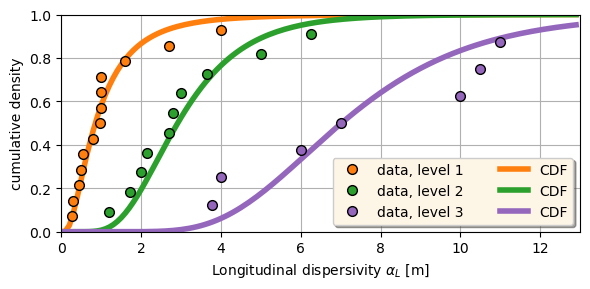

In [18]:
### Plot settings
cc = ['C1','C2','C4']
ms = 7

weights = data_xlsx['Info level']/data_xlsx['Reliability – A_L']

plt.figure(1,figsize=[6,3])
for ii,het_level in enumerate([1,2,3]):
    filter_het = (data_xlsx['Heterogeneity class']==het_level)*np.isfinite(data_xlsx['A_L'])
    aL_het = data_xlsx['A_L'][filter_het]
    plt.plot(np.sort(aL_het),np.linspace(0,1,len(aL_het)+2)[1:-1],'o',ls='',mec = 'k',ms=ms,c=cc[ii],zorder = 3,label='data, level {}  '.format(het_level))

for ii,het_level in enumerate([1,2,3]):
    filter_het = (data_xlsx['Heterogeneity class']==het_level)*np.isfinite(data_xlsx['A_L'])
    aL_het = data_xlsx['A_L'][filter_het]
    weights_het = weights[filter_het]

    meanw_het = np.average(aL_het,weights=weights_het)
    std_het = np.std(aL_het)

    log_mean = np.log(meanw_het**2/np.sqrt(meanw_het**2+std_het**2))
    log_var = np.log(1+(std_het/meanw_het)**2)

    alpha_range = np.arange(0.001,13,0.1)
    lognorm_cdf = cdf(alpha_range,log_mean,log_var)

    plt.plot(alpha_range,lognorm_cdf,c=cc[ii],lw=4,zorder = 2,label='CDF')
    
plt.xlim([0,13])
plt.ylim([0,1])
plt.legend(loc='lower right',fontsize=textsize,ncol=2,facecolor='oldlace',shadow = True)
plt.xlabel(r'Longitudinal dispersivity $\alpha_L$ [m]',fontsize=textsize)    
plt.ylabel('cumulative density',fontsize=textsize)    
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.grid(True)
plt.tight_layout()

# plt.savefig("CDF_long_dispersivity.png", dpi=300)
# plt.savefig("CDF_long_dispersivity.pdf")


Reproducing **Figure 3** of *Evidence Based Estimation of Macrodispersivity  for Groundwater Transport Applications* by Zech et al, 2022, Groundwater, doi: doi: 10.1111/gwat.13252


Illustration example for an instantaneous injection in a weakly heterogeneous aquifer: (a) longitudinal mass distribution and (b) cumulative longitudinal mass distribution at times $203$ and $461$ day after injection. Red lines: median predictions; blue lines: 10th and 90th percentiles; black dots in (b): observations from the **Cape Cod experiment**.

In [19]:
### experimental settings
t1 = 203 #d
t2 = 461 #d
U = 0.42 #m/d    
alphaL_mean = 1.1
alphaL_std = 1.1
x = np.arange(0,300,1) #m

### additional plot settings
cc = ['C1','C2','C4']

Create mass distributions for random values of dispersivity from log-normal distribution:

In [21]:
from scripts.analysis.functions import MonteCarloAlpha

m1_median, m1_90p, m1_10p = MonteCarloAlpha(x,t1,U,alphaL_mean,alphaL_std)
m2_median, m2_90p, m2_10p = MonteCarloAlpha(x,t2,U,alphaL_mean,alphaL_std)

M1_median, M1_90p, M1_10p = MonteCarloAlpha(x,t1,U,alphaL_mean,alphaL_std,cumulative = True)
M2_median, M2_90p, M2_10p = MonteCarloAlpha(x,t2,U,alphaL_mean,alphaL_std,cumulative = True)

In [22]:
### Read data values from Cape cod experiment
file_name = './data/Cape_Cod_day_{}.csv'
data_t1 = np.loadtxt(file_name.format(t1),delimiter=',')
data_t2 = np.loadtxt(file_name.format(t2),delimiter=',')

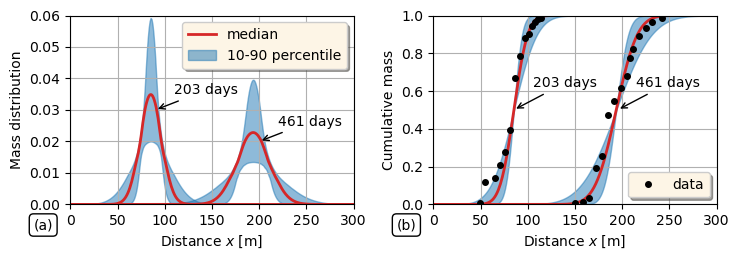

In [23]:
plt.figure(figsize=[7.5,2.7])
ax1=plt.subplot(121)  
ax2=plt.subplot(122)

ax1.plot(x,m1_median,color='C3',zorder=2,lw=2,label = 'median')
ax1.fill_between(x,m1_10p,m1_90p,color='C0',zorder=1,alpha = 0.5,label = '10-90 percentile')
ax1.plot(x,m2_median,color='C3',zorder=2,lw=2)
ax1.fill_between(x,m2_10p,m2_90p,color='C0',zorder=1,alpha = 0.5)
ax1.set_xlim([0,300])
ax1.set_ylim([0,0.06])
ax1.set_xlabel(r'Distance $x$ [m]',fontsize=textsize)    
ax1.set_ylabel('Mass distribution',fontsize=textsize)   

ax1.tick_params(axis="both",which="major",labelsize=textsize)
ax1.grid(True)
ax1.text(-0.13,-0.13,'(a)', bbox=dict(facecolor='w', alpha=1,boxstyle='round'),fontsize=textsize, transform=ax1.transAxes)
ax1.annotate('{} days'.format(t1),xy = (90,0.03),xytext = (110,0.035),arrowprops = dict(arrowstyle='->'))
ax1.annotate('{} days'.format(t2),xy = (200,0.02),xytext = (220,0.025),arrowprops = dict(arrowstyle='->'))
ax1.legend(loc = 'upper right',fontsize=textsize,facecolor='oldlace',framealpha = 1,shadow=True)

ax2.plot(x,M1_median,color='C3',zorder=2,lw=2)
ax2.fill_between(x,M1_10p,M1_90p,color='C0',zorder=1,alpha = 0.5)
ax2.plot(x,M2_median,color='C3',zorder=2,lw=2)
ax2.fill_between(x,M2_10p,M2_90p,color='C0',zorder=1,alpha = 0.5)

ax2.plot(data_t1[:,0],data_t1[:,1],'ok',ms=4)
ax2.plot(data_t2[:,0],data_t2[:,1],'ok',ms=4,label = 'data')
ax2.annotate('{} days'.format(t1),xy = (85,0.5),xytext = (105,0.62),arrowprops = dict(arrowstyle='->'))
ax2.annotate('{} days'.format(t2),xy = (195,0.5),xytext = (215,0.62),arrowprops = dict(arrowstyle='->'))

ax2.set_xlim([0,300])
ax2.set_ylim([0,1])
ax2.set_xlabel(r'Distance $x$ [m]',fontsize=textsize)    
ax2.set_ylabel('Cumulative mass',fontsize=textsize)    
ax2.tick_params(axis="both",which="major",labelsize=textsize)
ax2.grid(True)
ax2.text(-0.13,-0.13,'(b)', bbox=dict(facecolor='w', alpha=1,boxstyle='round'),fontsize=textsize, transform=ax2.transAxes)
ax2.legend(loc = 'lower right',fontsize=textsize,facecolor='oldlace',framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/12_Example_CapeCod.pdf")
# plt.savefig("./results/12_Example_CapeCod.png",dpi = 300)


Caption: Illustration example for an instantaneous injection in a weakly heterogeneous aquifer: (a) longitudinal mass distribution and (b) cumulative longitudinal mass distribution at times $203$ and $461$ day after injection. Red lines: median predictions; blue lines: 10th and 90th percentiles; black dots in (b): observations from the Cape Cod experiment.

----------------
## Plot combinations for lecture notes and lectures

### Condensed plot of all dispersivities in log-scale

Plot for lecture notes section 9

NameError: name 'data' is not defined

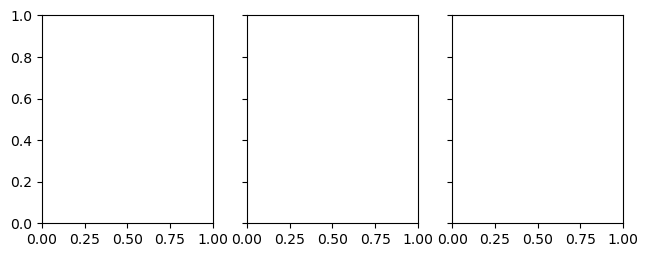

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols = 3,figsize=[7.5,2.7], sharey=True)
for ii,ax in enumerate(axes.flat):
    if ii==0:
        ax.scatter(data_xlsx['scale'].loc[data_xlsx['R – AL'] == 1.0],data_xlsx['AL'].loc[data_xlsx['R – AL'] == 1.0], color='gold',marker='o',zorder = 11,edgecolor=mec,s=msize,label=r'high')
        ax.scatter(data_xlsx['scale'].loc[data_xlsx['R – AL'] == 2.0],data_xlsx['AL'].loc[data_xlsx['R – AL'] == 2.0], color='C0',marker='o',zorder = 10,edgecolor=mec,s=msize,label=r'moderate')
        ax.set_title(r'longitudinal $\alpha_L$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
        ax.set_ylabel(r'dispersivity $\alpha$ [m]',fontsize=textsize)    
        # ax.legend(loc='lower left',fontsize=textsize)
        ax.legend(title = 'Reliability:',loc='lower left',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',shadow=True)               
    elif ii==1:
        ax.scatter(data_xlsx['scale'].loc[data['R – At/AV'] == 1.0],data['AT'].loc[data['R – At/AV'] == 1.0], color='gold',marker='s',zorder = 11,edgecolor=mec,s=msize,label=r'high reliablity')
        ax.scatter(data_xlsx['scale'].loc[data['R – At/AV'] == 2.0],data['AT'].loc[data['R – At/AV'] == 2.0], color='C0',marker='s',zorder = 10,edgecolor=mec,s=msize,label=r'moderate reliablity')
        # ax.legend(loc='upper left',fontsize=textsize)
        ax.set_title(r'transverse horizontal $\alpha_T$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
    elif ii==2:
        ax.scatter(data['scale'].loc[data['R – At/AV'] == 1.0],data['Av'].loc[data['R – At/AV'] == 1.0], color='gold',marker='^',zorder = 11,edgecolor=mec,s=msize,label=r'high')
        ax.scatter(data['scale'].loc[data['R – At/AV'] == 2.0],data['Av'].loc[data['R – At/AV'] == 2.0], color='C0',marker='^',zorder = 10,edgecolor=mec,s=msize,label=r'moderate')
        # ax.legend(loc='upper left',fontsize=textsize)
        ax.set_title(r'transverse vertical  $\alpha_V$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
        # ax.legend(title = 'Reliability:',loc='upper left',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',shadow=True)               

    ax.set_xlabel('Plume travel distance [m]',fontsize=textsize)    
    ax.set_xlim([1,2000])
    ax.tick_params(axis="both",which="major",labelsize=textsize)
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([2e-4,22])
plt.tight_layout()
# plt.savefig('./results/09_ADE_dispersivities.pdf')
# plt.savefig('./results/09_ADE_dispersivities.png',dpi = 300)

### Longitudinal macrodispersivities

Plot for lecture notes section 12

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=[7.5,3.])#, sharey=True)
c1,c2 = 'gold','C0'

for i in [0,1]:
    axes[i].scatter(data_xlsx['Scale'].loc[data_xlsx['Reliability – A_L']==1],data_xlsx['A_L'].loc[data_xlsx['Reliability – A_L']==1],color=c1,marker='o',zorder = 11,edgecolor=mec,s=msize,label=r'high')
    axes[i].scatter(data_xlsx['Scale'].loc[data_xlsx['Reliability – A_L']==2],data_xlsx['A_L'].loc[data_xlsx['Reliability – A_L']==2],color=c2,marker='o',zorder = 10,edgecolor=mec,s=msize,label=r'moderate')
    axes[i].set_xlabel('Plume travel distance [m]',fontsize=textsize)    
    axes[i].tick_params(axis="both",which="major",labelsize=textsize)
    axes[i].grid(True)
    axes[i].set_xscale('log')
    axes[i].set_xlim([1,5000])

axes[1].set_yscale('log')
axes[1].set_ylim([0.1,15])
axes[0].set_ylabel(r'Longitudinal dispersivity $\alpha_L$ [m]',fontsize=textsize)    
axes[0].legend(title = 'Reliability:',loc='upper left',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',shadow = True,framealpha = 1)

axes[0].text(700,10.2,r'semi-log',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
axes[1].text(2,8,r'log-log',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 


plt.tight_layout()
# plt.savefig('12_Data_long_dispersivities.pdf')
# plt.savefig('12_Data_long_dispersivities.png',dpi = 300)

### Transverse macrodispersivities and ratios

Plot for lecture notes section 12

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3,figsize=[7.5,2.6], sharey=True)
filter_R1 = (data_xlsx['Reliability – A_T/A_V']==1)
filter_R2 = (data_xlsx['Reliability – A_T/A_V']==2)
c1,c2 = 'gold','C0'
for ii,ax in enumerate(axes.flat):
    if ii==0:
        ax.scatter(data_xlsx['Scale'].loc[filter_R1],data_xlsx['A_T'].loc[filter_R1], color=c1,marker='s',zorder = 11,edgecolor=mec,s=msize,label=r'high')
        ax.scatter(data_xlsx['Scale'].loc[filter_R2],data_xlsx['A_T'].loc[filter_R2], color=c2,marker='s',zorder = 10,edgecolor=mec,s=msize,label=r'moderate')
        ax.set_title(r'transverse horizontal $\alpha_T$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
        ax.set_xlabel('Plume travel distance [m]',fontsize=textsize)    
        ax.set_ylabel(r'dispersivity $\alpha$ [m]',fontsize=textsize)    
        ax.set_xlim([0,230])
        # ax.legend(title = 'Reliability:',loc='best',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',shadow=True)               
    elif ii==1:
        ax.scatter(data_xlsx['Scale'].loc[filter_R1],data_xlsx['A_V'].loc[filter_R1], color=c1,marker='^',zorder = 11,edgecolor=mec,s=msize,label=r'high')
        ax.scatter(data_xlsx['Scale'].loc[filter_R2],data_xlsx['A_V'].loc[filter_R2], color=c2,marker='^',zorder = 10,edgecolor=mec,s=msize,label=r'moderate')
        ax.set_title(r'transverse vertical  $\alpha_V$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
        ax.set_xlabel('Plume travel distance [m]',fontsize=textsize)    
        ax.legend(title = 'Reliability:',loc='best',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',shadow=True)               
        ax.set_xlim([0,480])
    elif ii==2:
        ax.scatter(data_xlsx['Scale'].loc[filter_R1],data_xlsx['A_T'].loc[filter_R1]/data_xlsx['A_L'].loc[filter_R1],color=c1,marker='X',zorder = 11,edgecolor=mec,s=msize,label=r'high')
        ax.scatter(data_xlsx['Scale'].loc[filter_R2],data_xlsx['A_T'].loc[filter_R2]/data_xlsx['A_L'].loc[filter_R2],color=c2,marker='X',zorder = 10,edgecolor=mec,s=msize,label=r'moderate')
        ax.set_title(r'ratio $\alpha_T/\alpha_L$',fontsize=textsize,bbox=dict(facecolor='w',boxstyle='round')) 
        ax.set_xlabel('Plume travel distance [m]',fontsize=textsize)    
        ax.set_xlim([0,230])
    ax.tick_params(axis="both",which="major",labelsize=textsize)
    ax.grid(True)
#    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([3e-4,0.4])
plt.tight_layout()
# plt.savefig('12_Data_trans_dispersivities.pdf')
# plt.savefig('12_Data_trans_dispersivities.png',dpi = 300)